# Predicting a Pulsar Star 

Pulsar Star은 지구에서 감지할 수 있는 전파 방출을 생성하는 매우 희귀한 유형의 중성자별이며 시공간 및 물질 상태의 탐사선으로서 상당한 과학적 관심을 받고 있습니다. 그들의 방출은 하늘을 가로질러 퍼지고 감지할 수 있는 광대역 무선 방출 패턴을 생성합니다. 그러나 실제로 거의 모든 감지는 무선 주파수 간섭 및 노이즈로 인해 발생하므로 적법한 신호를 찾기가 어렵습니다.

이 문제의 주요 목적은 감지된 신호가 펄서 별에서 오는지 또는 노이즈, 간섭 등과 같은 다른 소스에서 오는지 예측하기 위해 딥 러닝 도구를 사용하여 간단한 분류기를 구축하는 것입니다.

### 0. 라이브러리 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### 1. 데이터 불러오기

In [2]:
path = "/content/drive/MyDrive/team_project1/data/"

In [4]:
df = pd.read_csv(path + "binary_classification_data.csv")
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [5]:
df.shape

(17898, 9)

### 2. EDA

#### 2-1. 데이터 타입 확인 및 결측치 확인
- 결측치 없음
- 모두 수치형 데이터

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     17898 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        17898 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                   17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


통합 프로필의 평균입니다 .

통합 프로파일의 표준편차 .

통합 프로파일의 과도한 첨도 .

통합 프로파일의 왜도 .

DM-SNR 곡선의 평균 .

DM-SNR 곡선의 표준편차 .

DM-SNR 곡선의 과도한 첨도 .

DM-SNR 곡선의 왜도 .

In [8]:
df.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


#### 2-2. target_class -> 수치형(이산형)
- 심한 불균형 데이터

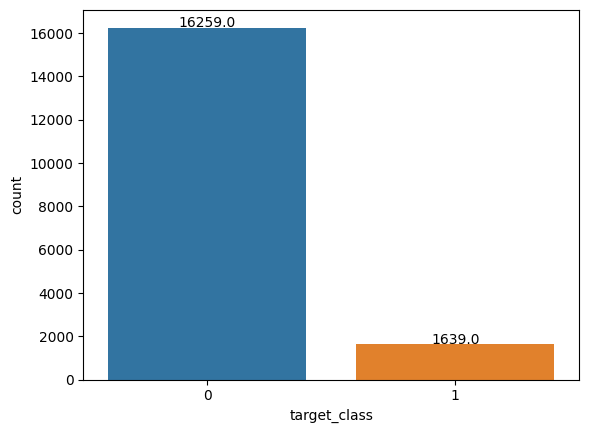

In [13]:
ax = sns.countplot(df, x='target_class')

for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width()/2, height+5, height, ha='center')
plt.show()

In [14]:
# 타겟과의 상관관계
df.corr()['target_class'].sort_values()

 Mean of the integrated profile                 -0.673181
 Excess kurtosis of the DM-SNR curve            -0.390816
 Standard deviation of the integrated profile   -0.363708
 Skewness of the DM-SNR curve                   -0.259117
 Mean of the DM-SNR curve                        0.400876
 Standard deviation of the DM-SNR curve          0.491535
 Skewness of the integrated profile              0.709528
 Excess kurtosis of the integrated profile       0.791591
target_class                                     1.000000
Name: target_class, dtype: float64

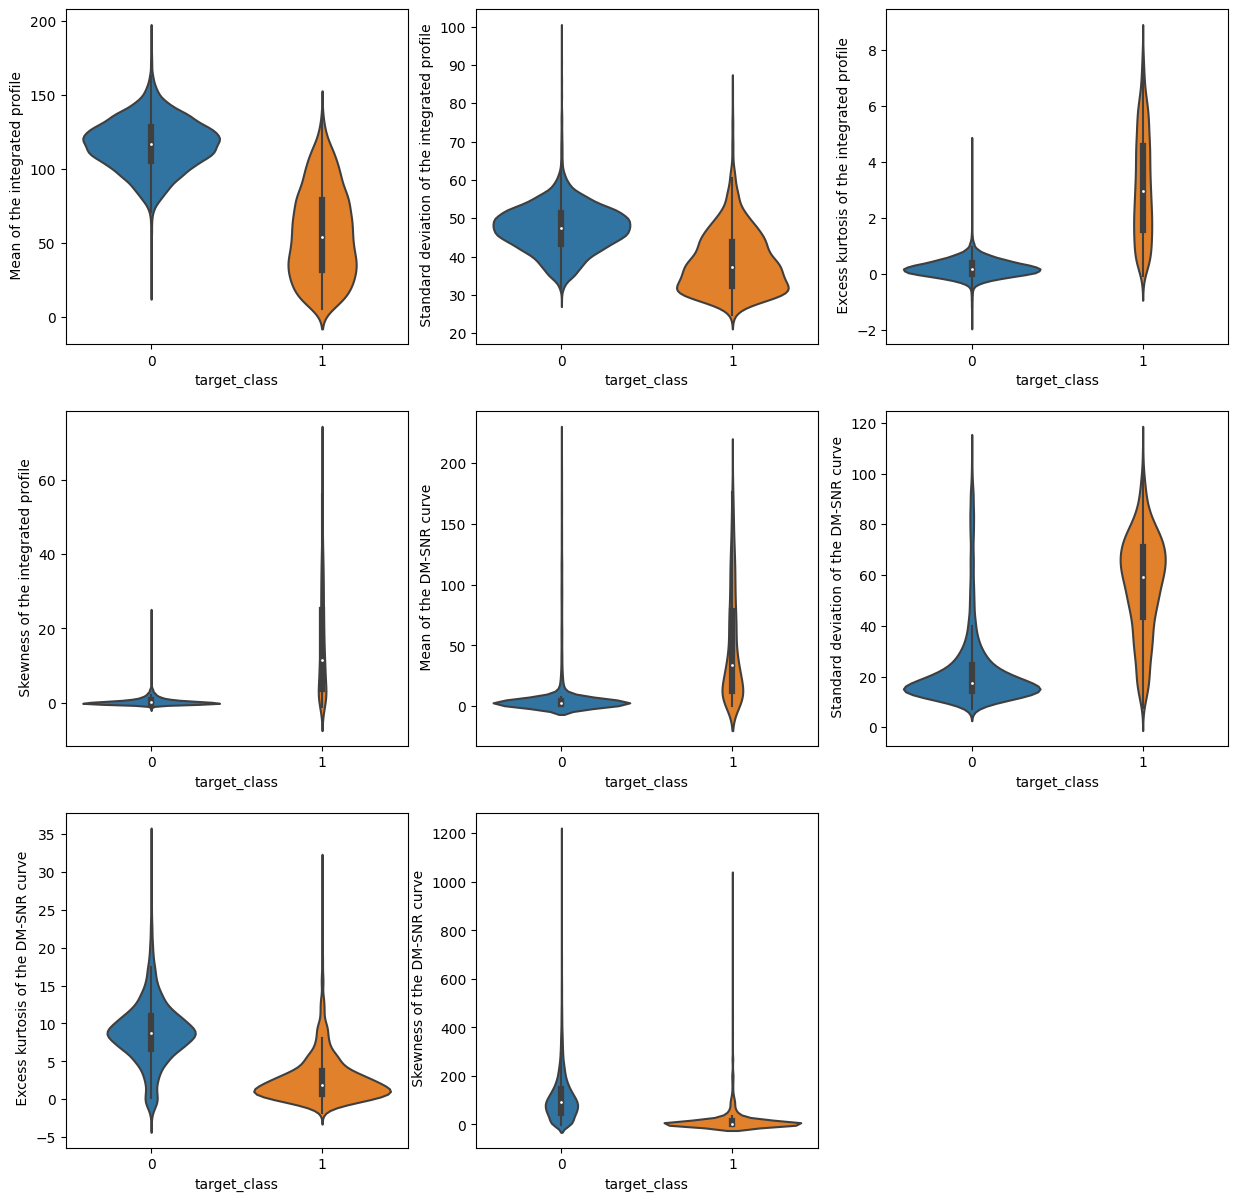

In [29]:
#violinlpot of all features
features = df.iloc[:,0:8]
plt.figure(figsize=(15,20))
j = 0
for i in features:
    plt.subplot(4,3,j+1)
    sns.violinplot(x=df["target_class"],y=df[i])
    j = j + 1